# ASTR 21100 

# "*Computational Techniques in Astrophysics*"

## Homework 6 exercise 

## Morphological classification of galaxies using neural networks (70 points)

### Preparatory steps

* Review the first four chapters of the free online book <a href="http://neuralnetworksanddeeplearning.com/">"Neural Networks and Deep Learning"</a> by Michael Nielsen.

* Familiarize yourself with the <a href="https://scikit-learn.org/stable/index.html">sci-kit learn</a> python library containing routines implementing many machine learning methods. For example, it has its own neural network implementation, which is illustrated on the hand-written digit classification problem <a href="https://scikit-learn.org/stable/modules/neural_networks_supervised.html">here</a>. 
If you decide to manipulate galaxy images to improve learning <a href="https://scikit-image.org/">sci-kit image</a> library can be useful.

* Install <a href="https://keras.io">keras</a> python package and review 2 chapters of Francois Chollet's book "Deep learning with python" that was distributed to you. 

* Review the code below that reads the training set table of probabilities and images of galaxies and make sure you understand and can run/use it. 

### Project description

* Set up a neural network with layers of your design based on what you learned by reading chapters in Michael Nielsen's and Francois Chollet's books. 
The input to your network is a galaxy image, while the output are two numbers that given probabilities that galaxy in the image has elliptical or disk morphology.


* Read training set of <a href="https://www.kaggle.com/c/galaxy-zoo-the-galaxy-challenge/data">galaxy zoo images</a> located in <tt>images_training_rev1</tt> subdirectory. Table with galaxy IDs and probabilities for each galaxy to be of elliptical or disk morphology is the CVS formatted table <tt>training_solutions_rev1.csv</tt>. Code below shows how to read the table and extract these two probabilities. There is also routine that display a collage of selected galaxy images. 


* Create training, validation, and test samples. Training sample is given as part of the galaxy zoo data set. You should use most of it for training, while a portion reserved for validation. Test images will be used after training to test the success rate of your network.


* Use the training set and truth table for it to train your network the best you can. Training will take a lot of time and generally the more you train the better results will be. Training can be sped up dramatically using GPU on a videocard with keras library. Training efficiency can also be improved by image manipulation (e.g., <a href="https://scipy-lectures.org/packages/scikit-image/index.html">with scikit-image</a> library). For example, take a look at the discussion on "Preprocessing and data augmentation" in the <a href="http://benanne.github.io/2014/04/05/galaxy-zoo.html">blog entry</a> by Sander Dieleman, who won the kaggle competition in 2014 on a more complicated version of this classification problem. 

In [1]:
import pandas as pd

df = pd.read_csv('projects/neural_nets/galaxy_zoo/training_solutions_rev1.csv')

In [2]:
print("Column headings:")
print(df.columns)

Column headings:
Index(['GalaxyID', 'Class1.1', 'Class1.2', 'Class1.3', 'Class2.1', 'Class2.2',
       'Class3.1', 'Class3.2', 'Class4.1', 'Class4.2', 'Class5.1', 'Class5.2',
       'Class5.3', 'Class5.4', 'Class6.1', 'Class6.2', 'Class7.1', 'Class7.2',
       'Class7.3', 'Class8.1', 'Class8.2', 'Class8.3', 'Class8.4', 'Class8.5',
       'Class8.6', 'Class8.7', 'Class9.1', 'Class9.2', 'Class9.3', 'Class10.1',
       'Class10.2', 'Class10.3', 'Class11.1', 'Class11.2', 'Class11.3',
       'Class11.4', 'Class11.5', 'Class11.6'],
      dtype='object')


In [3]:
# print the first 10 GalaxyIDs 
print(df['GalaxyID'][:10])

0    100008
1    100023
2    100053
3    100078
4    100090
5    100122
6    100123
7    100128
8    100134
9    100143
Name: GalaxyID, dtype: int64


In [4]:
# print the first 10 GalaxyIDs, pell, pdisk 
for i in range(10):
    # Class 1.1 = probability that galaxy has "elliptical" morpgology
    # Class 1.2 = probability that galaxy has "disk" morphology
    # Class 1.3 = probability that object is a star, not used here, but
    # in principle can be used to clean sample. 
    print("%d6   %.6f   %.6f"%(df['GalaxyID'][i], df['Class1.1'][i], df['Class1.2'][i]))

1000086   0.383147   0.616853
1000236   0.327001   0.663777
1000536   0.765717   0.177352
1000786   0.693377   0.238564
1000906   0.933839   0.000000
1001226   0.738832   0.238159
1001236   0.462492   0.456033
1001286   0.687783   0.288344
1001346   0.021834   0.976952
1001436   0.269843   0.730157


In [5]:
from PIL import Image
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

def zoo_img_collage(gal_id, nrow, ncol, path=None, savefig=None):
    """
    display a collage of images of galaxies from the Galaxy Zoo 
    located in the directory path
    """
    fig, axs = plt.subplots(nrow, ncol, figsize=(ncol, nrow))

    # Check that PIL is installed for jpg support
    if 'jpg' not in fig.canvas.get_supported_filetypes():
        raise ValueError("PIL required to load SDSS jpeg images")

    for _gid, ax in zip(gal_id, axs.flatten()):
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        
        outfile = path+str(_gid)+'.jpg'
        I = Image.open(outfile)
        ax.imshow(I, origin='lower')
        ax.set_aspect('auto')
        
    fig.subplots_adjust(hspace=0, wspace=0)
    if savefig != None:
        plt.savefig(savefig, bbox_inches='tight')
    plt.show()


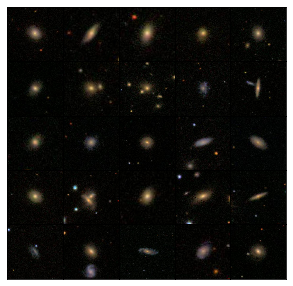

In [8]:
path = 'projects/neural_nets/galaxy_zoo/images_training_rev1/'

ngal = 25
nrow = 5; ncol = 5
gal_id = df['GalaxyID'][:ngal]

zoo_img_collage(gal_id, nrow, ncol, path=path, savefig=None)

In [16]:
# displaying pixel values of an image 
# ID of the first galaxy
gal_id = df['GalaxyID'][0]
# path to the image
img_file = path+str(gal_id)+'.jpg'
# open image
im = Image.open(img_file)
# convert image to pixel values of R,G,B
pixels = np.asarray(im)
# this will show us that we deal with 424 x 424 pixel images with 3 color channels: R, G, B
print(np.shape(pixels))

(424, 424, 3)


Converting R, G, B image to grayscale. There are different ways to do such conversion, see <a href="https://www.johndcook.com/blog/2009/08/24/algorithms-convert-color-grayscale/">here</a> for example. 

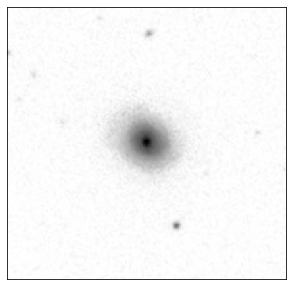

In [15]:
# using "luminosity" method
lum = 0.21 *pixels[:,:,0] + 0.72 * pixels[:,:,1] + 0.07 * pixels[:,:,2]

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.imshow(lum, origin='lower', cmap='Greys')
ax.set_aspect('auto')
plt.show()

Using scikit-image to read images and display them. Check out <a href="https://github.com/scikit-image/skimage-tutorials">scikit-image tutorials</a>.

In [28]:
from skimage.io import imread_collection

#your path 
col_dir = path+'100*.jpg'

#creating a collection with the available images
col = imread_collection(col_dir)

In [29]:
print(np.shape(col))

(64, 424, 424, 3)


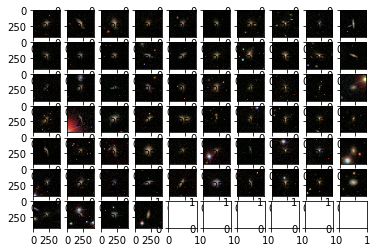

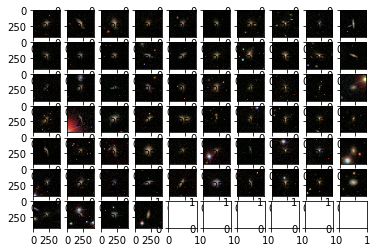

In [33]:
from skimage.io import imshow_collection

imshow_collection(col)